Interest Rates Correlation Matrix:


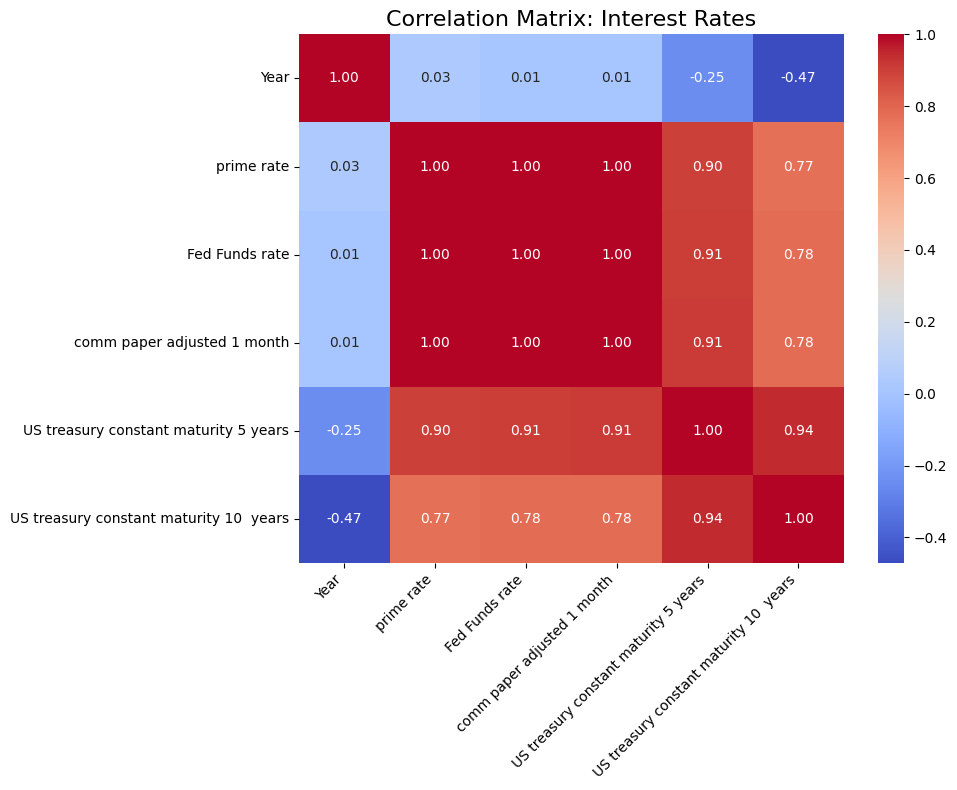

NEW CREDIT Correlation Matrix:


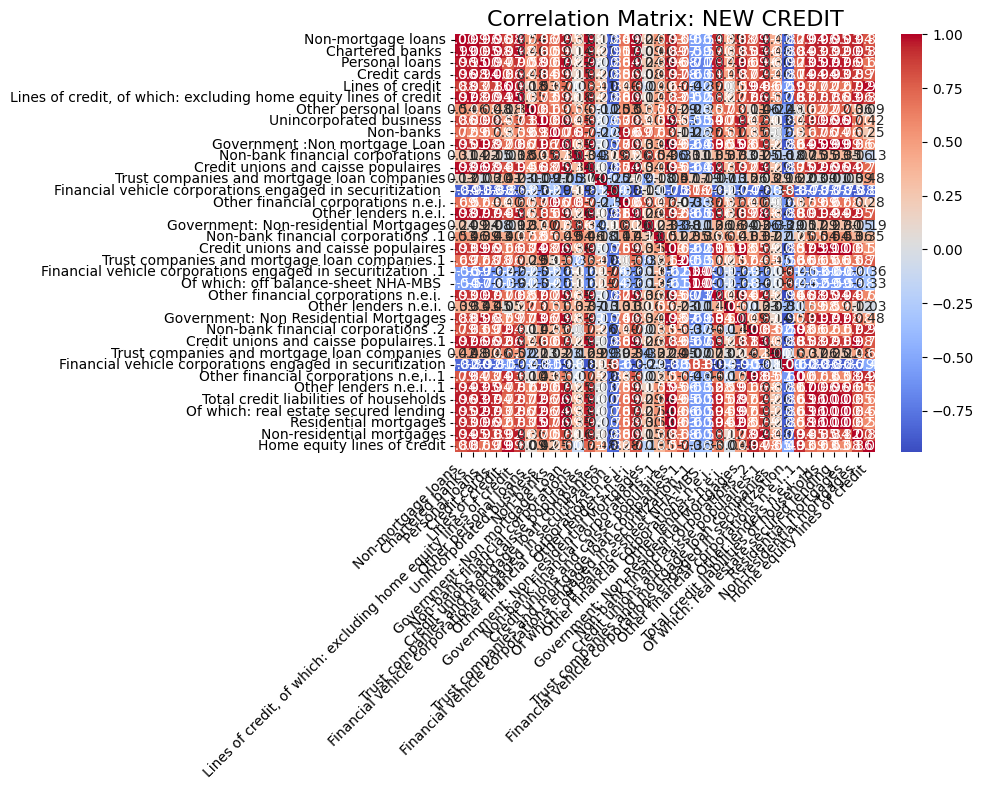

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets (ensure paths are correct for your files)
interest_rates_path = '/content/Interest rates.csv'
new_credit_path = '/content/NEW CREDIT.xlsx'
interest_rates_df = pd.read_csv(interest_rates_path)
new_credit_df = pd.read_excel(new_credit_path)

# Compute and visualize correlation matrices
def visualize_correlation(df, title):
    corr_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f"Correlation Matrix: {title}", fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    return corr_matrix

# Interest Rates correlation
print("Interest Rates Correlation Matrix:")
interest_rates_corr = visualize_correlation(interest_rates_df, "Interest Rates")

# NEW CREDIT correlation
print("NEW CREDIT Correlation Matrix:")
new_credit_corr = visualize_correlation(new_credit_df.select_dtypes(include=["number"]), "NEW CREDIT")


The correlation matrices for both datasets have been visualized:

Interest Rates Dataset:

Strong and weak correlations between attributes like prime rate, Fed Funds rate, and Treasury maturity rates can be observed.
Use this to focus on relationships of interest for regression analysis.

NEW CREDIT Dataset:

Attributes like Non-mortgage loans, Chartered banks, Residential mortgages, etc., have varying degrees of correlation.
This can guide the selection of predictors and target variables.

In [5]:
# Select features with absolute correlation > 0.5 (excluding the target)
interest_rates_target = 'prime rate'
interest_rates_features = interest_rates_corr[interest_rates_target][
    (interest_rates_corr[interest_rates_target].abs() > 0.5) &
    (interest_rates_corr[interest_rates_target].index != interest_rates_target)
].index.tolist()

new_credit_target = 'Total credit liabilities of households'
new_credit_features = new_credit_corr[new_credit_target][
    (new_credit_corr[new_credit_target].abs() > 0.5) &
    (new_credit_corr[new_credit_target].index != new_credit_target)
].index.tolist()

print(f"Selected features for Interest Rates: {interest_rates_features}")
print(f"Selected features for NEW CREDIT: {new_credit_features}")


Selected features for Interest Rates: ['Fed Funds rate', 'comm paper adjusted 1 month', 'US treasury constant maturity 5 years', 'US treasury constant maturity 10  years']
Selected features for NEW CREDIT: ['Non-mortgage loans', 'Chartered banks ', 'Personal loans ', 'Credit cards ', 'Lines of credit ', 'Lines of credit, of which: excluding home equity lines of credit ', 'Other personal loans ', 'Unincorporated business ', 'Non-banks ', 'Government :Non mortgage Loan', 'Credit unions and caisse populaires ', 'Financial vehicle corporations engaged in securitization ', 'Other financial corporations n.e.i.', 'Other lenders n.e.i.', 'Non-bank financial corporations .1', 'Credit unions and caisse populaires', 'Trust companies and mortgage loan companies.1', 'Financial vehicle corporations engaged in securitization .1', 'Of which: off balance-sheet NHA-MBS ', 'Other financial corporations n.e.i. ', 'Other lenders n.e.i. ', 'Government: Non Residential Mortgages', 'Non-bank financial corpora

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Function to train and evaluate regression models
def run_regression(X, y, dataset_name):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{dataset_name} Regression Results:")
    print(f"R^2 Score: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    return model, r2, mae

# Interest Rates Regression
X_interest_rates = interest_rates_df[interest_rates_features]
y_interest_rates = interest_rates_df[interest_rates_target]
model_ir, r2_ir, mae_ir = run_regression(X_interest_rates, y_interest_rates, "Interest Rates")

# NEW CREDIT Regression
X_new_credit = new_credit_df[new_credit_features]
y_new_credit = new_credit_df[new_credit_target]
model_nc, r2_nc, mae_nc = run_regression(X_new_credit, y_new_credit, "NEW CREDIT")


Interest Rates Regression Results:
R^2 Score: 0.9984
Mean Absolute Error: 0.0418
NEW CREDIT Regression Results:
R^2 Score: 1.0000
Mean Absolute Error: 0.0000


In [7]:
# Display results summary
results_summary = {
    "Interest Rates Regression": {
        "Target": interest_rates_target,
        "Features": interest_rates_features,
        "R^2 Score": r2_ir,
        "Mean Absolute Error": mae_ir,
    },
    "NEW CREDIT Regression": {
        "Target": new_credit_target,
        "Features": new_credit_features,
        "R^2 Score": r2_nc,
        "Mean Absolute Error": mae_nc,
    },
}

for key, value in results_summary.items():
    print(f"{key}:")
    for sub_key, sub_value in value.items():
        print(f"  {sub_key}: {sub_value}")


Interest Rates Regression:
  Target: prime rate
  Features: ['Fed Funds rate', 'comm paper adjusted 1 month', 'US treasury constant maturity 5 years', 'US treasury constant maturity 10  years']
  R^2 Score: 0.9983658740380137
  Mean Absolute Error: 0.0418285944118554
NEW CREDIT Regression:
  Target: Total credit liabilities of households
  Features: ['Non-mortgage loans', 'Chartered banks ', 'Personal loans ', 'Credit cards ', 'Lines of credit ', 'Lines of credit, of which: excluding home equity lines of credit ', 'Other personal loans ', 'Unincorporated business ', 'Non-banks ', 'Government :Non mortgage Loan', 'Credit unions and caisse populaires ', 'Financial vehicle corporations engaged in securitization ', 'Other financial corporations n.e.i.', 'Other lenders n.e.i.', 'Non-bank financial corporations .1', 'Credit unions and caisse populaires', 'Trust companies and mortgage loan companies.1', 'Financial vehicle corporations engaged in securitization .1', 'Of which: off balance-shee

Interest Rates Dataset

Target Variable:
prime rate
Selected Features (High Correlation):
Fed Funds rate:
Strong correlation with prime rate.
Likely reflects direct monetary policy impacts on lending rates.
comm paper adjusted 1 month:
Indicates short-term corporate borrowing rates, closely tied to market liquidity and central bank policies.
US treasury constant maturity 5 years:
Medium-term government bond yields, showing the broader interest rate environment.
US treasury constant maturity 10 years:
Long-term yields, representing investor expectations about inflation and economic growth.

Regression Performance:
𝑅
2
R
2
  Score: 0.9984

The model explains 99.84% of the variance in prime rate.
Mean Absolute Error (MAE): 0.0418
On average, predictions deviate by ~0.04 percentage points from the actual prime rate.
Insight:
The prime rate is highly predictable using the chosen features, indicating strong relationships between short-term, medium-term, and long-term interest rates.


NEW CREDIT Dataset

Target Variable:
Total credit liabilities of households
Selected Features (High Correlation):
This dataset has a large number of correlated features, reflecting the interconnected nature of credit and financial products. Key categories include:

Loan Types:

Non-mortgage loans, Personal loans, Residential mortgages, Non-residential mortgages.
These directly contribute to household credit liabilities.

Credit Sources:
Chartered banks, Non-banks, Credit unions, Lines of credit.
Reflects where households access credit.

Specialized Credit:
Home equity lines of credit, Trust companies, Financial vehicle corporations engaged in securitization.
Capture niche lending mechanisms.
Aggregates:
Of which: real estate secured lending, Other financial corporations.

Regression Performance:
𝑅
2
R
2
  Score: 1.0
The model perfectly predicts the Total credit liabilities of households.

Mean Absolute Error (MAE): ~0.0
Predictions are essentially identical to actual values.

Insight:
The model shows a perfect fit, which might indicate:
A direct dependency in the data (e.g., Total credit liabilities might sum several features directly).
Overfitting due to a large number of highly correlated features.
Further analysis is required to verify if such precision generalizes to unseen data.
Key Observations Across Datasets

Interest Rates Dataset:

Reflects strong, stable relationships between different interest rate indicators.
Insights can inform monetary policy analysis and lending strategy.

NEW CREDIT Dataset:

Household credit liabilities are directly tied to various loan products and institutions.
Features likely contain overlapping or redundant information (e.g., summation effects).